# Case Study on Testing of Hypothesis
 A company started to invest in digital marketing as a new way of their product
 promotions.For that they collected data and decided to carry out a study on it.
  * The company wishes to clarify whether there is any increase in sales after
     stepping into digital marketing.
  * The company needs to check whether there is any dependency between the
     features “Region” and “Manager”.
     
Help the company to carry out their study with the help of data provided.

# Importing Dataset..etc

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Importing data

In [26]:
data = pd.read_csv('Sales_add.csv')

In [27]:
data.head(10)

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106
7,Month-8,Region - A,Manager - A,131140,230637
8,Month-9,Region - B,Manager - C,171259,226261
9,Month-10,Region - C,Manager - B,141956,193735


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [29]:
data.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


# 1.The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.

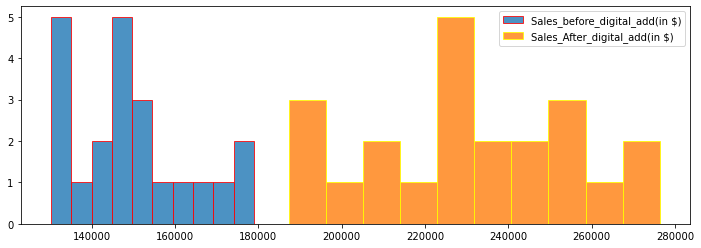

In [71]:
plt.figure(figsize=(12,4))
plt.hist(data['Sales_before_digital_add(in $)'],label='Sales_before_digital_add(in $)', alpha=.8, edgecolor='red')
plt.hist(data['Sales_After_digital_add(in $)'],label='Sales_After_digital_add(in $)', alpha=.8, edgecolor='yellow')
plt.legend()
plt.show()

### Conclusion:
* It is clear that the sale after entering into digital marketing is greater than sale before digital marketing.

# 2.The company needs to check whether there is any dependency between the features “Region” and “Manager”.

For the test of dependence we use chi square test. 
* if the values of variance is below 0.05 there is dependence
* if the value is greater that 0.05 it is independent

In [31]:
#The tabs to be tested are selected.
Field1 = data['Region']
Field2 = data['Manager']

In [32]:
#we use crosstab for the cound.
myCrosstable = pd.crosstab(Field1,Field2)
myCrosstable

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [33]:
#using chi2_contingency
from scipy.stats import chi2_contingency

In [34]:
#the chi-value,the variance,size of the table,expected values
chiVal, pVal, df, exp = chi2_contingency(myCrosstable)
chiVal, pVal, df, exp

(3.050566893424036,
 0.5493991051158094,
 4,
 array([[4.09090909, 3.18181818, 2.72727273],
        [2.86363636, 2.22727273, 1.90909091],
        [2.04545455, 1.59090909, 1.36363636]]))

## Conclusion:
As it is seen that the p-value is greater than 0.05 the Region and Manager is independent.